##### In this project, we will see the effect of different attributes on diabetes disease diagnosis

steps:

1: Importing libraries and Exploring the Dataset.

2: Checking missing values.

3: Creating visual methods to analyze the data.

4: Analyzing trends, patterns, and relationships in the Data

5: Appling logestic regression model, Confusion matrix,and classification report

6:Appling SVM

7:Appling KNN
    

### 1: Importing libraries and Exploring the Dataset

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots
from sklearn.neighbors import KNeighborsClassifier

In [38]:
## reading the datset and column renaming and displaying first rows
colunm_names= ['pregnancies','glucose','bpressure','skinfold','insulin','bmi','pedigree','age','class']
df=pd.read_csv('data.csv',names=colunm_names)
df.head()

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
#Info about the data shape , type , number of enteries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   bpressure    768 non-null    int64  
 3   skinfold     768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   pedigree     768 non-null    float64
 7   age          768 non-null    int64  
 8   class        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
# a brief summary for the dataset
df.describe()

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2: Checking missing values

In [41]:
# Check for the null values 
df.isna().apply(pd.value_counts)

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
False,768,768,768,768,768,768,768,768,768


### 3: Creating visual methods to analyze the data.

### 4: Analyzing trends, patterns, and relationships in the Data.

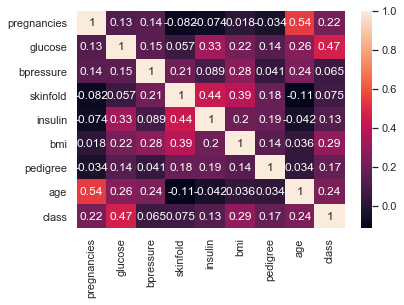

In [42]:
df.corr()
sns.heatmap(df.corr(),annot=True)

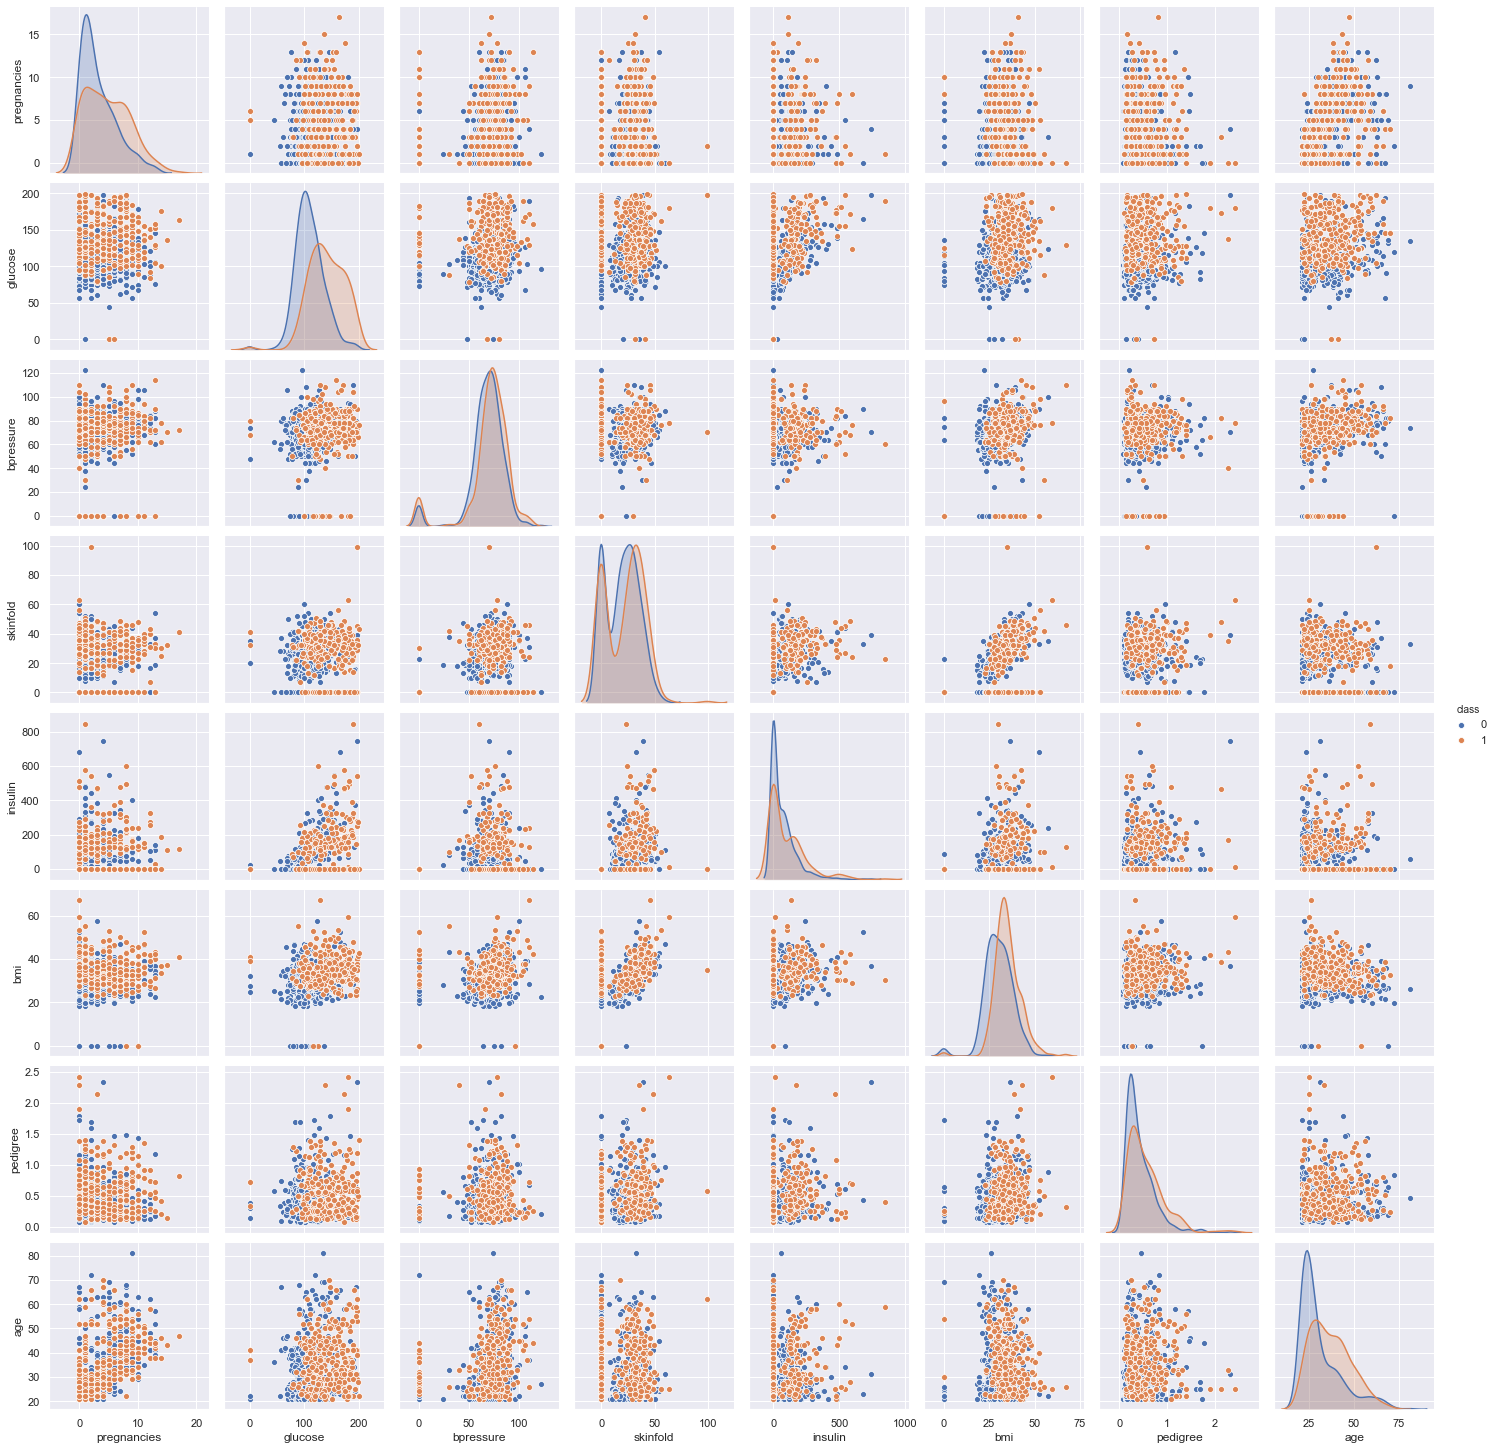

In [44]:
sns.pairplot(df,hue='class')

### 5: Appling logestic regression model, Confusion matrix,and classification report

In [46]:
# Importing the dataset
df=pd.read_csv('data.csv')
X = df.iloc[:,0:8].values
y = df.iloc[:,8].values

In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[110,  16],
       [ 29,  37]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.765625

In [26]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       126
           1       0.70      0.56      0.62        66

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



### 6: Appling SVM

In [28]:
# Importing the dataset
df=pd.read_csv('data.csv')
X = df.iloc[:,0:8].values
y = df.iloc[:,8].values

In [29]:
# data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)


In [30]:
# data scaling
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)

In [31]:
for k in ('linear','poly','rbf','sigmoid'):
    clf=svm.SVC(kernel=k)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_train)
    print(k)
    print(accuracy_score(y_train,y_pred))

linear
0.7808695652173913
poly
0.8034782608695652
rbf
0.8278260869565217
sigmoid
0.6956521739130435


In [32]:
clf=svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
x_test=sc.transform(x_test)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7708333333333334


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       126
           1       0.70      0.59      0.64        66

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.77      0.77       192



### 7:applying KNN

In [59]:
## data set
colunm_names= ['pregnancies','glucose','bpressure','skinfold','insulin','bmi','pedigree','age','class']
df=pd.read_csv('data.csv',names=colunm_names)

# Defining X and y
X = df.drop('class',axis=1)
y = df['class']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Importing and fitting KNN classifier for k=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

# Predicting results using Test data set
pred = knn.predict(X_test)
accuracy_score(pred,y_test)

0.7135416666666666